## Comparison of TD(0) and First Visit MC - Part 2 (GridWorld domain)

##### Sumana Basu (260727568)

**Domain Description :**

**States :**

For the purpose of this experiment a 4x4 GridWorld has been chosen.

Start state : state '00' is the start state

Terminal state : state '15' is the end state

**Action :**

Up, down, left and right (all of which are equally likely at every state)

** Reward Structure :**

* If the robot hits the wall of the grid : 0
* If the robot reaches the exit : +1
* Everywhere else : -1

**Environment :**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
#Learning Rate for calculation of expected value function
ALPHA = 0.01

#Discount Factor
GAMMA = 0.9

#Number of Episodes
NUM_EPISODES = 50000

#Number of episodes
n_episodes = 2000

#Number of look-ahead steps. This is 1 for TD(0)
n_runs = 100

#Different learning parameters
alphas = [0.01, 0.05, 0.1, 0.5, 0.9]

In [3]:
#Define States
states = ['00', '01', '02','03',
          '04', '05','06', '07',
          '08', '09', '10', '11',
          '12', '13', '14','15']

In [4]:
EXIT_STATES = ['15']

In [5]:
intermediate_states = [s for s in states if s not in EXIT_STATES]

In [6]:
#Define Actions
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

UP = 'UP'
DOWN = 'DOWN'
LEFT = 'LEFT'
RIGHT = 'RIGHT'

In [7]:
state_transitions = {
                '00' : {UP : '00', DOWN : '04', LEFT : '00', RIGHT : '01'},
                '01' : {UP : '01', DOWN : '05', LEFT : '00', RIGHT : '02'},
                '02' : {UP : '02', DOWN : '06', LEFT : '01', RIGHT : '03'},
                '03' : {UP : '03', DOWN : '07', LEFT : '02', RIGHT : '03'},   
                '04' : {UP : '00', DOWN : '08', LEFT : '04', RIGHT : '05'}, 
                '05' : {UP : '01', DOWN : '09', LEFT : '04', RIGHT : '06'},
                '06' : {UP : '02', DOWN : '10', LEFT : '05', RIGHT : '07'},   
                '07' : {UP : '03', DOWN : '11', LEFT : '06', RIGHT : '07'},    
                '08' : {UP : '04', DOWN : '12', LEFT : '08', RIGHT : '09'},
                '09' : {UP : '05', DOWN : '13', LEFT : '08', RIGHT : '10'},
                '10' : {UP : '06', DOWN : '14', LEFT : '09', RIGHT : '11'},
                '11' : {UP : '07', DOWN : '15', LEFT : '10', RIGHT : '11'},
                '12' : {UP : '08', DOWN : '12', LEFT : '12', RIGHT : '13'},
                '13' : {UP : '09', DOWN : '13', LEFT : '12', RIGHT : '14'},
                '14' : {UP : '10', DOWN : '14', LEFT : '13', RIGHT : '15'},
                '15' : {UP : '15', DOWN : '15', LEFT : '15', RIGHT : '15'},
              }

In [8]:
def generateRandomAction():
    random_prob = random.uniform(0,1)
    #print random_prob
    if random_prob >= 0.75:
        return 'RIGHT'
    elif random_prob >= 0.5:
        return 'DOWN'
    elif random_prob >= 0.25:
        return 'LEFT'
    else:
        return 'UP'

In [9]:
def getNextState(currentState, action):
    nextState = state_transitions[currentState][action]
    if currentState == nextState:
        reward = 0
    elif nextState in EXIT_STATES:
        reward = 1
    else:
        reward = -1
    return nextState, reward

In [10]:
def generateEpisode():
    step_state = []
    step_action = []
    step_reward = []

    start_state = '00'

    curr_state = start_state

    while curr_state not in EXIT_STATES:

        action = generateRandomAction()
        next_state, reward = getNextState(curr_state, action)

        step_state.append(curr_state)
        step_action.append(action)
        step_reward.append(reward)

        curr_state = next_state
        if reward == 0:
            break
    
    return step_state, step_action, step_reward

In [11]:
#Generate Episodes

all_episodes_state = []
all_episodes_action = []
all_episodes_reward = []

for i in range(NUM_EPISODES):
    s, a, r = generateEpisode()

    all_episodes_state.append(s)
    all_episodes_action.append(a)
    all_episodes_reward.append(r)

**Expected Value Calculation - TD(0)**

Expected value function is obtained using TD(0) on the 50,000 episodes generated above

In [12]:
#Define initial state values under given policy

state_value = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
                             '10', '11', '12', '13', '14', '15'], 0)

In [13]:
def TD0():
    state_value = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
                             '10', '11', '12', '13', '14', '15'], 0)
    
    for i in range(NUM_EPISODES):
        c = 1
        episode_length = len(all_episodes_state[i])
        for state, action, reward in zip(all_episodes_state[i], all_episodes_action[i], all_episodes_reward[i]):
            if c == episode_length:
                expected_return = reward
            else:
                expected_return = reward + GAMMA * state_value[state_transitions[state][action]]
            state_value[state] = state_value[state] + ALPHA * (expected_return - state_value[state])
            c = c + 1
            #print state, action, reward
    return state_value

In [14]:
actual_state_value = TD0()

In [15]:
actual_state_value

{'00': -1.9390999087293714,
 '01': -2.5120517560610653,
 '02': -2.5370805825982075,
 '03': -1.7170720988033117,
 '04': -2.6637750927381587,
 '05': -3.836377280847139,
 '06': -3.7316920775931615,
 '07': -2.242787114952612,
 '08': -2.5488162977462974,
 '09': -3.634091969019459,
 '10': -3.47462713204368,
 '11': -1.7059757281525882,
 '12': -1.5702378958002672,
 '13': -2.237855548604727,
 '14': -1.7154119312490996,
 '15': 0}

**Evaluate :**
    
On the same 4000 episodes, TD(0) and first visit MC have been performed for 100 iterations and the average has been considered.

I searched for optimal learning rate for both the algorithms :

* TD(0) is optimal for alpha = 0.1

* MC is optimal for alpha = 0.01

We compared TD(0) and MC for their respective optimal learning rates.

In [16]:
def rmse(state_value, actual_state_value):
    sq_error_sum = 0
    for cur_state in states:
        sq_error = (state_value[cur_state] - actual_state_value[cur_state]) ** 2
        sq_error_sum += sq_error
    avg_sq_error = sq_error_sum / len(state_value)
    return avg_sq_error

In [17]:
def TD0_evaluate(n_episodes, n_runs, alpha):
    #start_state = '00'
    
    rmse_all_runs = np.zeros((n_episodes, n_runs))
    
    for k in range(n_runs):
        state_value = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
                             '10', '11', '12', '13', '14', '15'], 0)
        rmse_per_episode = np.zeros(n_episodes)
        for i in range(n_episodes):
            c = 1
            episode_length = len(all_episodes_state[i])
            for state, action, reward in zip(all_episodes_state[i], all_episodes_action[i], all_episodes_reward[i]):
                if c == episode_length:
                     expected_return = reward
                else:
                    expected_return = reward + GAMMA * state_value[state_transitions[state][action]]
                state_value[state] = state_value[state] + alpha * (expected_return - state_value[state])
                c = c + 1

            rmse_per_episode[i] = rmse(state_value, actual_state_value)
        rmse_all_runs[:,k] = rmse_per_episode  
        
    return state_value, rmse_all_runs

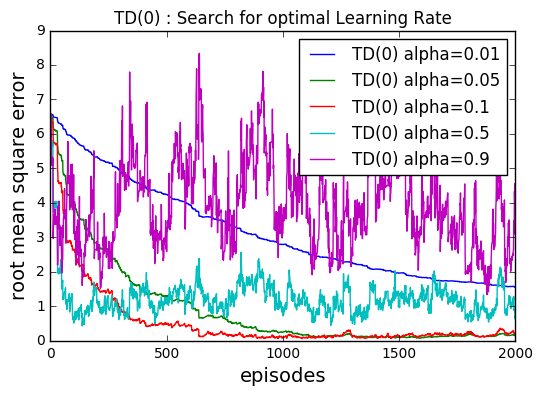

In [28]:
avg_rmse_all = np.zeros((n_episodes, len(alphas)))
for i in range(len(alphas)):
    state_value = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
                             '10', '11', '12', '13', '14', '15'], 0)
    alpha = alphas[i]
    state_value, rmse_all_runs = TD0_evaluate(n_episodes, n_runs, alpha)
    avg_rmse = np.mean(rmse_all_runs, axis=1)
    avg_rmse_all[:, i] = avg_rmse
    plt.plot(np.arange(n_episodes) + 1, avg_rmse_all[:,i], label='TD(0) alpha=' + str(alpha))    

plt.xlabel('episodes', fontsize=14)
plt.ylabel('root mean square error', fontsize=14)
plt.legend(loc='upper right')
plt.title('TD(0) : Search for optimal Learning Rate')
plt.show()

In [19]:
def firstVisitMC_evaluate(n_episodes, n_itr, alpha):
    episodes_state = all_episodes_state[:n_episodes]
    episodes_reward = all_episodes_reward[:n_episodes]
    
    visited = np.zeros((len(states)))
    count = np.zeros((len(states)))
    rmse_per_episode = np.zeros((n_episodes, n_itr))
    

    for k in range(n_itr):
        avg_returns = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
                             '10', '11', '12', '13', '14', '15'], 0)
        for i in range(n_episodes):
            visited = np.zeros((len(states)))
            for j in range(len(episodes_state[i])):
                s = episodes_state[i][j]
                if visited[int(s)] == 0:
                    mc_return = sum(episodes_reward[i][j:])
                    count[int(s)] += 1
                    #avg_returns[s] = avg_returns[s] + (mc_return - avg_returns[s])/count[int(s)]
                    avg_returns[s] = avg_returns[s] + (mc_return - avg_returns[s])*alpha
                    visited[int(s)] = 1
            #rmse
                rmse_per_episode[i,k] = rmse(avg_returns, actual_state_value)
    #print avg_returns    
    return rmse_per_episode

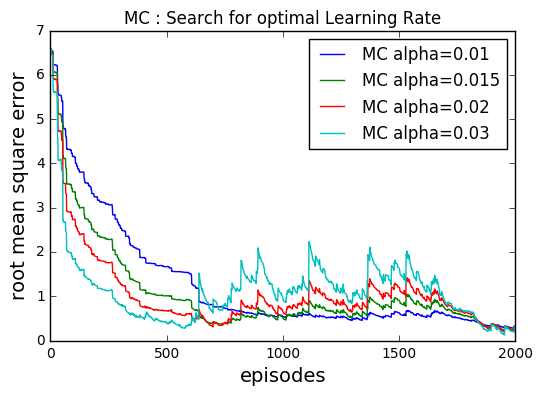

In [29]:
alphas_mc = [0.01, 0.015, 0.02, 0.03]
avg_rmse_all_mc = np.zeros((n_episodes, len(alphas_mc)))
for i in range(len(alphas_mc)):
    #state_value_mc = dict.fromkeys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
    #                         '10', '11', '12', '13', '14', '15'], 0)
    alpha = alphas_mc[i]
    rmse_all_runs_mc = firstVisitMC_evaluate(n_episodes, n_runs, alpha)
    avg_rmse_mc = np.mean(rmse_all_runs_mc, axis=1)
    avg_rmse_all_mc[:, i] = avg_rmse_mc
    plt.plot(np.arange(n_episodes) + 1, avg_rmse_all_mc[:,i], label='MC alpha=' + str(alpha))    

plt.xlabel('episodes', fontsize=14)
plt.ylabel('root mean square error', fontsize=14)
plt.legend(loc='upper right')
plt.title('MC : Search for optimal Learning Rate')
plt.show()

**Comparison**

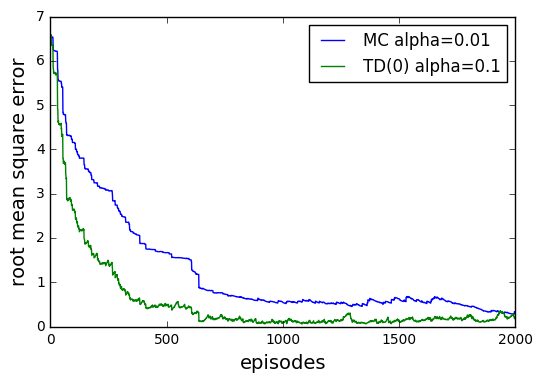

In [23]:
i = 0
plt.plot(np.arange(n_episodes) + 1, avg_rmse_all_mc[:,i], label='MC alpha=' + str(alphas_mc[i])) 

i = 2
plt.plot(np.arange(n_episodes) + 1, avg_rmse_all[:,i], label='TD(0) alpha=' + str(alphas[i]))


plt.xlabel('episodes', fontsize=14)
plt.ylabel('root mean square error', fontsize=14)
plt.legend(loc='upper right')
plt.show()

** Discussion :**
    
In this setting, TD(0) converges faster than MC

** Conclusion :**

Out of these two prediction algorithms, which method learns faster or which one makes the more efficient use of limited data is dependant on the environment and choice of policy